<a href="https://colab.research.google.com/github/laszloferenczi/InfineonDigileanTechDay2024/blob/main/timeseries/LSTM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy
import pandas
import matplotlib.pyplot as plt
import math
import keras
import tensorflow as tf
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [40]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [41]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df = pandas.read_csv('airline-passengers.txt', usecols=[1], engine='python')
dataset = df.values
dataset = dataset.astype('float32')
# print(dataset)

In [42]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
# print(dataset)

In [43]:
# split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [54]:
# reshape into X=t and Y=t+3
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# print(trainX)

In [55]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# print(trainX)

In [56]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 - 2s - 33ms/step - loss: 0.0150
Epoch 2/100
75/75 - 0s - 4ms/step - loss: 0.0047
Epoch 3/100
75/75 - 0s - 4ms/step - loss: 0.0043
Epoch 4/100
75/75 - 0s - 3ms/step - loss: 0.0042
Epoch 5/100
75/75 - 0s - 4ms/step - loss: 0.0040
Epoch 6/100
75/75 - 0s - 4ms/step - loss: 0.0037
Epoch 7/100
75/75 - 0s - 2ms/step - loss: 0.0034
Epoch 8/100
75/75 - 0s - 2ms/step - loss: 0.0033
Epoch 9/100
75/75 - 0s - 2ms/step - loss: 0.0030
Epoch 10/100
75/75 - 0s - 4ms/step - loss: 0.0028
Epoch 11/100
75/75 - 0s - 4ms/step - loss: 0.0026
Epoch 12/100
75/75 - 0s - 2ms/step - loss: 0.0025
Epoch 13/100
75/75 - 0s - 2ms/step - loss: 0.0022
Epoch 14/100
75/75 - 0s - 2ms/step - loss: 0.0022
Epoch 15/100
75/75 - 0s - 2ms/step - loss: 0.0020
Epoch 16/100
75/75 - 0s - 4ms/step - loss: 0.0018
Epoch 17/100
75/75 - 0s - 2ms/step - loss: 0.0018
Epoch 18/100
75/75 - 0s - 4ms/step - loss: 0.0016
Epoch 19/100
75/75 - 0s - 4ms/step - loss: 0.0015
Epoch 20/100
75/75 - 0s - 2ms/step - loss: 0.0014
Epoch 21/100
75/75 -

In [57]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [58]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [59]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.09 RMSE
Test Score: 25.91 RMSE


In [60]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [61]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

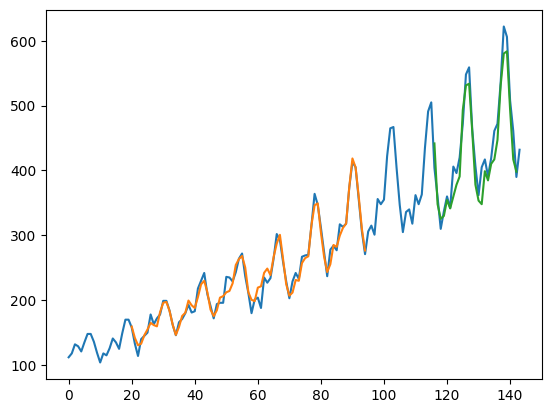

In [62]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()